In [138]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 
# import plotly.express as px
# import plotly.io as pio

import sys
sys.path.append("../scripts")
from TrackReconstruction_functions import *
from reconstruction_functions import *



In [139]:
# diff = "nodiff"
# diff = "5percent"
# diff = "0.25percent"
# diff = "0.1percent"
diff = "0.05percent"
# diff = "0.0percent"
pressure = 25

# Set the detector size depending on the pressure
density = 5.987*pressure
M = 1000/0.9
det_size = 1000*np.cbrt((4 * M) / (np.pi * density))/2.0
print(det_size)

# Load in the signal metadata
nubb_meta = pd.read_hdf(f"../data/Trackreco/ATPC_0nubb_{pressure}bar_{diff}_reco.h5", "meta")
nubb_meta["Type"] = "0nubb"
display(nubb_meta)

# ----------------------------------------------------------------------------------------------------

# Load in the background
Bkg_meta = pd.DataFrame()
Tl_meta = pd.DataFrame()
Bi_meta = pd.DataFrame()

Tl_meta = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_{pressure}bar_{diff}_reco.h5", "meta")
Tl_meta["Type"] = "Tl"
Bi_meta = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_{pressure}bar_{diff}_reco.h5", "meta")
Bi_meta["Type"] = "Bi"
single_meta = pd.read_hdf(f"../data/Trackreco/ATPC_single_{pressure}bar_{diff}_reco.h5", "meta")
single_meta["Type"] = "single"

Bkg_meta = pd.concat([Tl_meta, Bi_meta, single_meta])
# Bkg_meta = pd.concat([Tl_meta])
display(Bkg_meta)

# ----------------------------------------------------------------------------------------------------
# Load in the files for plotting the background events

# Tl                = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_{pressure}bar_{diff}_reco.h5",    "data")
# Tl_true_hits      = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_{pressure}bar_nexus_filtered.h5", "MC/hits")
# Tl_true_parts     = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_{pressure}bar_nexus_filtered.h5", "MC/particles")

# Bi                = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_{pressure}bar_{diff}_reco.h5",    "data")
# Bi_true_hits      = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_{pressure}bar_nexus_filtered.h5", "MC/hits")
# Bi_true_parts     = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_{pressure}bar_nexus_filtered.h5", "MC/particles")

# Tl_diffused_hits  = pd.read_hdf(f"../data/Trackreco/ATPC_Tl_ion_{pressure}bar_{diff}_filtered.h5", "MC/hits")
# Bi_diffused_hits  = pd.read_hdf(f"../data/Trackreco/ATPC_Bi_ion_{pressure}bar_{diff}_filtered.h5", "MC/hits")


# Single              = pd.read_hdf(f"../data/Trackreco/ATPC_single_{pressure}bar_{diff}_reco.h5",    "data")

# Shift the positions
# Tl["Type"] = "Tl"
# Bi["Type"] = "Bi"
# Single["Type"] = "single"
# Tl_true_hits["z"] = Tl_true_hits["z"] + det_size
# Bi_true_hits["z"] = Bi_true_hits["z"] + det_size

# Bkg            =  pd.concat([Tl, Bi, Single])
# Bkg_true_hits  =  pd.concat([Tl_true_hits, Bi_true_hits])
# Bkg_true_parts =  pd.concat([Tl_true_parts, Bi_true_parts])
# Bkg_diffused_hits = pd.concat([Tl_diffused_hits, Bi_diffused_hits])

# Bkg            =  pd.concat([Tl])
# Bkg_true_hits  =  pd.concat([Tl_true_hits])
# Bkg_true_parts =  pd.concat([Tl_true_parts])

# ----------------------------------------------------------------------------------------------------
# Load in the pickle files
# bi_file = f"../data/Trackreco/ATPC_Bi_{pressure}bar_{diff}_trackreco.pkl"
# tl_file = f"../data/Trackreco/ATPC_Tl_ion_{pressure}bar_{diff}_trackreco.pkl"

# # Load Bi data
# with open(bi_file, 'rb') as pickle_file:
#     Tracks_Bi = pickle.load(pickle_file)
#     connections_Bi = pickle.load(pickle_file)
#     connection_counts_Bi = pickle.load(pickle_file)

# Load Tl data
# with open(tl_file, 'rb') as pickle_file:
#     Tracks_Tl = pickle.load(pickle_file)
#     connections_Tl = pickle.load(pickle_file)
#     connection_counts_Tl = pickle.load(pickle_file)

# # Merge dictionaries
# Bkg_Tracks = {**Tracks_Bi, **Tracks_Tl}
# Bkg_connections = {**connections_Bi, **connections_Tl}
# Bkg_connection_counts = {**connection_counts_Bi, **connection_counts_Tl}

# Bkg_Tracks = {**Tracks_Tl}
# Bkg_connections = {**connections_Tl}
# Bkg_connection_counts = {**connection_counts_Tl}

# ----------------------------------------------------------------------------------------------------




1057.1650214164088


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,blob1RTD,blob2RTD,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label,contained,Type
0,74,0,1,3,8,71.453,2.316280,0.799728,0.691218,0.799728,0.015103,0.799728,0.015103,1.000000,1.000000,8.460891e-18,0.000000,Primary,True,0nubb
0,74,1,0,5,6,26.901,0.141003,0.116602,0.024401,0.116602,0.024401,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000,Brem,True,0nubb
0,75,0,1,0,1,17.108,2.447686,2.374683,0.073003,2.374683,0.073003,2.374683,0.073003,1.000000,1.000000,0.000000e+00,0.000000,Primary,True,0nubb
0,76,0,1,1,2,26.736,2.465145,1.060075,0.510381,1.060075,0.510381,1.060075,0.510381,1.000000,1.000000,0.000000e+00,0.000000,Primary,True,0nubb
0,77,0,1,0,1,16.927,2.461499,2.260668,0.200831,2.260668,0.200831,2.260668,0.200831,1.000000,1.000000,0.000000e+00,0.000000,Primary,True,0nubb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,803,0,1,4,11,67.160,2.292682,1.009739,0.697234,0.810622,0.597725,0.810622,0.597725,1.502122,1.009114,7.242925e-01,0.063892,Primary,False,0nubb
0,803,1,0,0,1,3.465,0.159393,0.159021,0.000372,0.159021,0.000372,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000,Brem,False,0nubb
0,804,0,1,0,1,54.248,2.461127,1.087427,0.953618,1.081793,0.953618,1.081793,0.953618,1.000000,1.000000,0.000000e+00,0.000000,Primary,True,0nubb
0,805,0,1,1,2,34.384,2.458722,0.578548,0.446867,0.578548,0.446867,0.578548,0.446867,1.000000,1.000000,0.000000e+00,0.000000,Primary,True,0nubb


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,blob1R,blob2R,blob1RTD,blob2RTD,Tortuosity1,Tortuosity2,Squiglicity1,Squiglicity2,label,contained,Type
0,50006,0,1,1,3,29.014,1.537721,0.192680,0.034855,0.192680,0.034855,0.192680,0.034855,1.0,1.0,1.953973e-16,0.0,Primary,True,Tl
0,50006,1,0,4,4,0.000,0.211338,0.211338,0.211338,0.211338,0.211338,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,Brem,True,Tl
0,50006,2,0,5,5,0.000,0.125582,0.125582,0.125582,0.125582,0.125582,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,Brem,True,Tl
0,50006,3,0,6,6,0.000,0.068102,0.068102,0.068102,0.068102,0.068102,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,Brem,True,Tl
0,50006,4,0,7,7,0.000,0.004671,0.004671,0.004671,0.004671,0.004671,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,Brem,True,Tl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,40958,3,0,5,6,5.847,0.229945,0.219615,0.010330,0.219615,0.010330,0.000000,0.000000,1.0,1.0,0.000000e+00,0.0,Brem,True,single
0,40962,0,1,0,3,58.999,2.465194,1.017433,0.344884,0.663604,0.344884,0.663604,0.344884,1.0,1.0,0.000000e+00,0.0,Primary,True,single
0,40966,0,1,1,3,65.670,2.000501,1.307213,0.392673,0.816836,0.001323,0.816836,0.001323,1.0,1.0,0.000000e+00,0.0,Primary,True,single
0,40966,1,0,5,5,0.000,0.455095,0.455095,0.455095,0.455095,0.455095,0.000000,0.000000,0.0,0.0,0.000000e+00,0.0,Brem,True,single


In [140]:
nubb_events = len(nubb_meta.event_id.unique())
Bkg_events = len(Bkg_meta.event_id.unique())
Bi_events = len(Bi_meta.event_id.unique())
Tl_events = len(Tl_meta.event_id.unique())
single_events = len(single_meta.event_id.unique())

print("0vbb:", nubb_events)
print("Bkg:", Bkg_events)
print("Bi:", Bi_events)

sf_bkg = nubb_events/Bkg_events
sf_bi = nubb_events/Bi_events
sf_tl = nubb_events/Tl_events
sf_single = nubb_events/single_events
print("Bkg scale factor:", sf_bkg)
print("Bi scale factor:", sf_bi)
print("Tl scale factor:", sf_tl)
print("Single scale factor:", sf_single)

0vbb: 188725
Bkg: 781714
Bi: 389318
Bkg scale factor: 0.24142461309379135
Bi scale factor: 0.4847579613580672
Tl scale factor: 0.9148085312651478
Single scale factor: 1.0048023937430453


In [141]:
# Plot some variables like number of tracks
%matplotlib widget


def PlotDistributions(df_meta, col, label, pressure, diffusion, mode, Eres, scale_factor, axs, applycuts):

    print("Running cuts with")
    print("Pressure:",  pressure,"bar")
    print("Diffusion:", diffusion )

    uselog=True
    # uselog=False

    df_primary = df_meta[ (df_meta.label == "Primary") & (df_meta.primary == 1)]

    # Apply the cuts
    if applycuts:
        df_meta, df_primary, cuts = ApplyCuts(df_meta, df_primary, pressure, diffusion, mode, Eres)
        df_primary = df_primary[ cuts ]
        df_meta = df_meta[(df_meta.event_id.isin(df_primary.event_id.unique()))]

    event_energy = df_meta.groupby("event_id").energy.sum()

    df_counts      = GetNTracks(df_meta)
    df_counts_evts = df_counts[df_counts.N_tracks >= 1].event_id.unique()

    # Number of brems and deltas
    N_brem  = GetNParticles(df_meta, "Brem")
    N_delta = GetNParticles(df_meta, "Delta")

    # Dataframes containing brems and deltas
    deltas = GetDeltas(df_meta)
    brems  = GetBrems(df_meta)

    # This is the sum of the primary and delta energies attached to it
    trk_e = GetTrackDeltaEnergy(df_meta)

    # Calculate the ratio of x-rays to tracks
    # x_ray_ratio = df_meta.groupby("event_id").apply(compute_ratio).reset_index(name="ratio")


    weights        = np.ones_like(df_primary.energy)  * scale_factor
    weights_counts = np.ones_like(df_counts.N_tracks) * scale_factor
    weights_deltas = np.ones_like(deltas.energy)      * scale_factor
    weights_brem   = np.ones_like(brems.energy)       * scale_factor
    weights_Ndelta = np.ones_like(N_delta.N_Delta)    * scale_factor
    weights_Nbrem  = np.ones_like(N_brem.N_Brem)      * scale_factor
    weights_trke   = np.ones_like(trk_e)              * scale_factor
    weights_energy = np.ones_like(event_energy)       * scale_factor

    bin_edges = np.arange(-0.5, 7.5, 1)
    bin_centers = np.arange(0, 7, 1)

    # Multiplicities
    axs[0,0].hist(df_counts.N_tracks, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_counts);
    # axs[0,0].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label);
    axs[0,0].set_xlabel("N Tracks per event")
    axs[0,0].set_ylabel("Entries")
    axs[0,0].set_xticks(bin_centers) ;
    axs[0,0].legend()
    if (uselog): axs[0,0].semilogy()

    axs[0,1].hist(df_primary.length, bins = np.linspace(0, 5000/pressure, 100), histtype="step", color = col, label = label, weights = weights);
    axs[0,1].set_xlabel("Primary Track Length / P [mm/bar]")
    axs[0,1].set_ylabel("Entries")
    axs[0,1].legend()
    if (uselog): axs[0,1].semilogy()

    axs[0,2].hist(df_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights);
    axs[0,2].set_xlabel("Primary Track Energy [MeV]")
    axs[0,2].set_ylabel("Entries")
    axs[0,2].legend()
    if (uselog): axs[0,2].semilogy()

    axs[1,1].hist(df_primary.blob1, bins = np.linspace(0, 2, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,1].set_xlabel("Blob 1 energy [MeV]")
    axs[1,1].set_ylabel("Entries")
    axs[1,1].legend()
    if (uselog): axs[1,1].semilogy()

    axs[2,1].hist(df_primary.blob2, bins = np.linspace(0, 2, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,1].set_xlabel("Blob 2 energy [MeV]")
    axs[2,1].set_ylabel("Entries")
    axs[2,1].legend()
    if (uselog): axs[2,1].semilogy()

    axs[1,0].hist(df_primary.blob1R, bins = np.linspace(0, 2, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,0].set_xlabel("Blob 1 energy radius [MeV]")
    axs[1,0].set_ylabel("Entries")
    axs[1,0].legend()
    if (uselog): axs[1,0].semilogy()

    axs[2,0].hist(df_primary.blob2R, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,0].set_xlabel("Blob 2 energy radius [MeV]")
    axs[2,0].set_ylabel("Entries")
    axs[2,0].legend()
    if (uselog): axs[2,0].semilogy()

    axs[1,2].hist(df_primary.Tortuosity1, bins = np.linspace(0, 10, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,2].set_xlabel("Tortuosity Blob 1")
    axs[1,2].set_ylabel("Entries")
    axs[1,2].legend()
    if (uselog): axs[1,2].semilogy()

    axs[2,2].hist(df_primary.Tortuosity2, bins = np.linspace(0, 6, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,2].set_xlabel("Tortuosity Blob 2")
    axs[2,2].set_ylabel("Entries")
    axs[2,2].legend()
    if (uselog): axs[2,2].semilogy()

    axs[3,0].hist(df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,0].set_xlabel("Squiglicity Blob 2 [MeV]")
    axs[3,0].set_ylabel("Entries")
    axs[3,0].legend()
    if (uselog): axs[3,0].semilogy()

    axs[3,1].hist(df_primary.Tortuosity1/df_primary.Tortuosity2, bins = np.linspace(0, 3, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,1].set_xlabel("Tortuosity Ends Ratio")
    axs[3,1].set_ylabel("Entries")
    axs[3,1].legend()
    if (uselog): axs[3,1].semilogy()

    axs[3,2].hist(df_primary.Squiglicity1/df_primary.Squiglicity2, bins = np.linspace(0, 5, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,2].set_xlabel("Squiglicity Ends Ratio")
    axs[3,2].set_ylabel("Entries")
    axs[3,2].legend()
    if (uselog): axs[3,2].semilogy()

    axs[4,0].hist(deltas.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,0].set_xlabel("Delta Energy [MeV]")
    axs[4,0].set_ylabel("Entries")
    axs[4,0].legend()
    if (uselog): axs[4,0].semilogy()

    axs[4,1].hist(brems.energy, bins = np.linspace(0,1,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[4,1].set_xlabel("Brem Energy [MeV]")
    axs[4,1].set_ylabel("Entries")
    axs[4,1].legend()
    if (uselog): axs[4,1].semilogy()

    axs[4,2].hist(deltas.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_deltas);
    axs[4,2].set_xlabel("Delta Length [mm]")
    axs[4,2].set_ylabel("Entries")
    axs[4,2].legend()
    if (uselog): axs[4,2].semilogy()

    axs[5,0].hist(brems.length, bins = np.linspace(0,250,100), histtype="step", color = col, label = label, weights = weights_brem);
    axs[5,0].set_xlabel("Brem Length [mm]")
    axs[5,0].set_ylabel("Entries")
    axs[5,0].semilogy()
    axs[5,0].legend()
    if (uselog): axs[5,0].semilogy()

    axs[5,1].hist(N_brem.N_Brem, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Nbrem);
    axs[5,1].set_xlabel("N Brem per event")
    axs[5,1].set_ylabel("Entries")
    axs[5,1].set_xticks(bin_centers) ;
    axs[5,1].legend()
    if (uselog): axs[5,1].semilogy()

    axs[5,2].hist(N_delta.N_Delta, bins = bin_edges, histtype="step", color = col, label = label, weights = weights_Ndelta);
    axs[5,2].set_xlabel("N Delta per event")
    axs[5,2].set_ylabel("Entries")
    axs[5,2].set_xticks(bin_centers) ;
    axs[5,2].legend()
    if (uselog): axs[5,2].semilogy()

    axs[6,0].hist(trk_e, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights_trke);
    axs[6,0].set_xlabel("Primary +Delta Track Energy [MeV]")
    axs[6,0].set_ylabel("Entries")
    axs[6,0].legend()
    if (uselog): axs[6,0].semilogy()

    axs[6,1].hist(event_energy, bins = np.linspace(2.3,2.6,100), histtype="step", color = col, label = label, weights = weights_energy);
    axs[6,1].set_xlabel("Event Energy [MeV]")
    axs[6,1].set_ylabel("Entries")
    axs[6,1].legend()
    if (uselog): axs[6,1].semilogy()

    # axs[6,2].hist(deltas.Tortuosity1, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights_deltas);
    # axs[6,2].set_xlabel("Delta Blob2 Energy")
    # axs[6,2].set_ylabel("Entries")
    # axs[6,2].legend()
    # if (uselog): axs[6,2].semilogy()

    axs[6,2].hist(df_primary.blob2RTD, bins = np.linspace(0, 2, 100), histtype="step", color = col, label = label, weights = weights);
    axs[6,2].set_xlabel("Blob 2 energy RTD [MeV]")
    axs[6,2].set_ylabel("Entries")
    axs[6,2].legend()
    if (uselog): axs[6,2].semilogy()


    bin_edges = np.arange(-0.5, 3.5, 0.5)
    bin_centers = np.arange(0, 3, 0.5)

    # Multiplicities
    # axs[6,1].hist(x_ray_ratio.ratio, bins = bin_edges, histtype="step", color = col, label = label);
    # axs[6,1].set_xlabel("N x-rays per track")
    # axs[6,1].set_ylabel("Entries")
    # axs[6,1].set_xticks(bin_centers) ;
    # axs[6,1].legend()
    # if (uselog): axs[6,1].semilogy()



    plt.tight_layout()

    return df_primary.event_id.unique()

# fig, axs = plt.subplots(7, 3, figsize=(15, 25))
# PlotDistributions(nubb_meta, "orange", f"0nubb {pressure}bar",pressure, diff, "all", 1.0, 1, axs, False)
# PlotDistributions(Bkg_meta,  "Teal",   f"Bkg {pressure}bar",  pressure, diff, "all", 1.0, sf_bkg, axs, False)



Cuts are being optimized for next1t analysis
Running cuts with
Pressure: 25 bar
Diffusion: 0.05percent


/var/folders/cf/0fb79lcx5z9by5185swm__x00000gr/T/ipykernel_7513/475597883.py:139: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  if (uselog): axs[4,1].semilogy()
/var/folders/cf/0fb79lcx5z9by5185swm__x00000gr/T/ipykernel_7513/475597883.py:150: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[5,0].semilogy()
/var/folders/cf/0fb79lcx5z9by5185swm__x00000gr/T/ipykernel_7513/475597883.py:159: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  if (uselog): axs[5,1].semilogy()
/var/folders/cf/0fb79lcx5z9by5185swm__x00000gr/T/ipykernel_7513/475597883.py:206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


Running cuts with
Pressure: 25 bar
Diffusion: 0.05percent


/var/folders/cf/0fb79lcx5z9by5185swm__x00000gr/T/ipykernel_7513/475597883.py:157: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[5,1].set_xticks(bin_centers) ;
/var/folders/cf/0fb79lcx5z9by5185swm__x00000gr/T/ipykernel_7513/475597883.py:206: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


Correcting Efficiency by factor  0.876
Efficiency nubb: 24.746  +/- 0.104 %
Bkg Rej: Bkg: 1.725 +/- 0.015 %      (bkg rej == 98.275 %)
FOM: 1.8841100377151774
Num Sig: 53313
Num Bkg: 13485


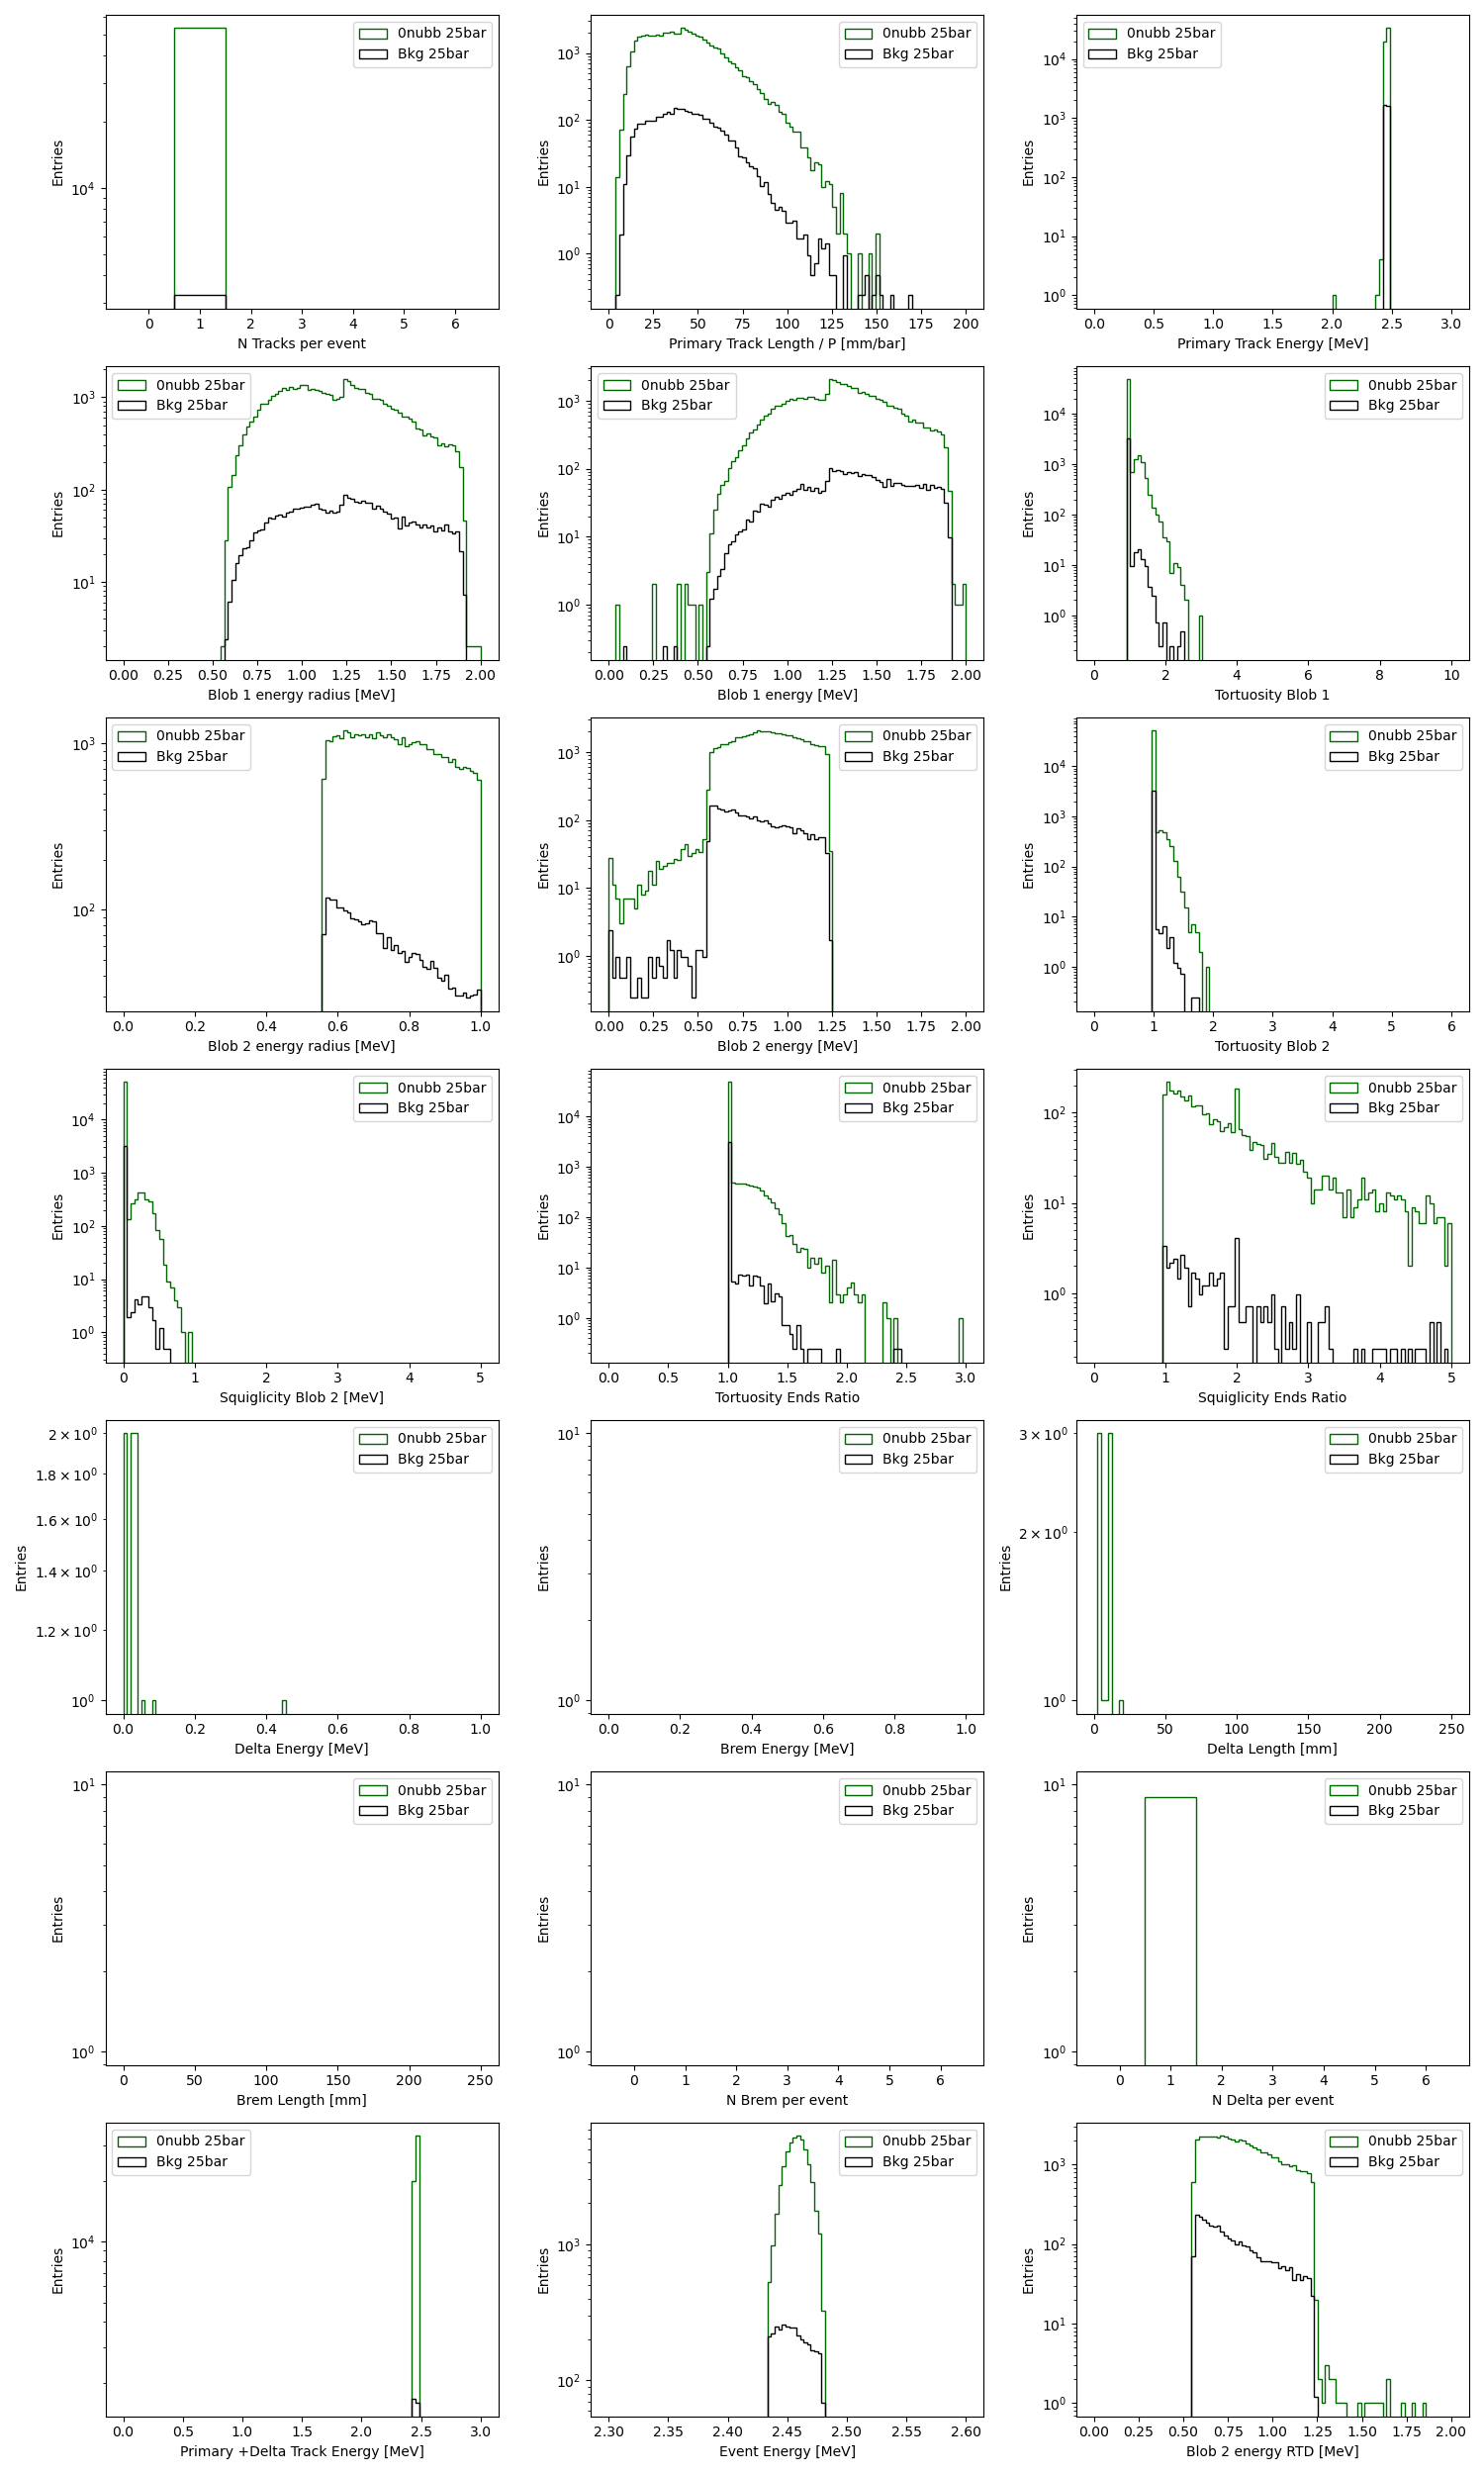

In [145]:


def ApplyCuts(df_meta, df_primary, pressure, diffusion, mode, Eres):

    cuts = []

    # Apply containment
    df_meta = df_meta[df_meta.contained == True]
    df_primary = df_primary[df_primary.contained == True]
    df_meta, df_primary = ApplyEventEnergyCut(df_meta, df_primary, Eres)

    # This is common for all NEXT-tonne analysis
    if (mode == "next1t"):
        df_counts = GetNTracks(df_meta)
        df_counts = df_counts[df_counts.N_tracks == 1]
        df_meta = df_meta[df_meta["event_id"].isin(df_counts.event_id.unique())]
        df_primary = df_primary[df_primary["event_id"].isin(df_counts.event_id.unique())]

    # 1 bar
    if (pressure == 1):
       
        # 1bar no diff
        if (diffusion == "nodiff"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.25) & (df_primary.blob2 > 0.45) & (df_primary.energy > 2.38)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.44) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.38)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 5%
        elif (diffusion == "5percent"):
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.37) & (df_primary.blob2RTD > 0.4) & (df_primary.blob1R > 0.34) &  (df_primary.energy > 2.35) & (df_primary.Tortuosity2 >1.3)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.44) & (df_primary.blob2 > 0.45) & (df_primary.blob1R > 0.34) &  (df_primary.energy > 2.35) & (df_primary.Tortuosity2 >1.3)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.4)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.25%
        elif (diffusion == "0.25percent"):
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.42) & (df_primary.blob2 > 0.45) & (df_primary.energy > 2.39)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.45) & (df_primary.blob2 > 0.54) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.47)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.1%
        elif (diffusion == "0.1percent"):
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.42) & (df_primary.blob2 > 0.45) & (df_primary.energy > 2.4) & (df_primary.length > 1000)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.44) & (df_primary.blob2 > 0.6)  & (df_primary.energy > 2.4) & (df_primary.length > 1000)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.45)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 10 He%
        elif (diffusion == "0.05percent"):
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.41) & (df_primary.blob2 > 0.4) & (df_primary.energy > 2.4) & (df_primary.length > 1000)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.48) & (df_primary.blob2 > 0.5) & (df_primary.energy > 2.4) & (df_primary.length > 600)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.45)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 1bar 0.0%
        elif (diffusion == "0.0percent"):
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2 > 0.18) & (df_primary.blob2R > 0.27) &  (df_primary.energy > 2.33) & (df_primary.length > 600)
            elif (mode == "nat"):
                cuts = (df_primary.blob2 > 0.35) & (df_primary.blob2R > 0.38) &  (df_primary.blob1 > 0.55) &  (df_primary.energy > 2.4) & (df_primary.length > 600)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.33)
            else:
                print("Unknown cut mode specified")

        else:
            print("Unknown diffusion specified")
    # -------------------------------------------------------------------------------------------------------------------------------------
    # 5bar
    elif (pressure == 5):
    
        # 5 bar no diff
        if (diffusion == "nodiff"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.42) & (df_primary.blob2 > 0.5) & (df_primary.energy > 2.4)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.45) & (df_primary.blob2 > 0.51) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.51)
            else:
                print("Unknown efficiency target specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 5bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.48) & (df_primary.blob1R > 0.5) & (df_primary.energy > 2.4) & (df_primary.Tortuosity2 > 1.3)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.4) &  (df_primary.blob2 > 0.56) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.51)
            else:
                print("Unknown cut mode specified")

        # 5bar 10% He
        elif (diffusion == "0.05percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2 > 0.67) & (df_primary.energy > 2.35) & (df_primary.blob1R > 0.6) 
            elif (mode == "nat"):
                cuts = (df_primary.blob2 > 0.71) & (df_primary.energy > 2.4) & (df_primary.length > 200)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.49)
            else:
                print("Unknown cut mode specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 10bar
    elif (pressure == 10):

        # 10bar no diff
        if (diffusion == "nodiff"):
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.4) & (df_primary.blob2 > 0.575) & (df_primary.energy > 2.4)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.5) & (df_primary.blob2 > 0.57) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.56)
            else:
                print("Unknown cut mode specified")

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 10bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.51) & (df_primary.blob2 > 0.5) & (df_primary.blob1R > 0.6) & (df_primary.energy > 2.4) 
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.52) & (df_primary.blob2 > 0.55) &  (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.56)
            else:
                print("Unknown cut mode specified")

        # 10bar 10% He
        elif (diffusion == "0.05percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.44) & (df_primary.blob2 > 0.27) & (df_primary.energy > 2.37) 
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.45) & (df_primary.blob2 > 0.47) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.5)
            else:
                print("Unknown cut mode specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 15bar
    elif (pressure == 15):
        
        # 15bar no diff
        if (diffusion == "nodiff"):
        
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.52) & (df_primary.blob2 > 0.61) & (df_primary.energy > 2.4)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.56) & (df_primary.blob2 > 0.58) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.6)
            else:
                print("Unknown cut mode specified")

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 15bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.54) & (df_primary.blob2 > 0.56) & (df_primary.blob1 > 0.4) & (df_primary.energy > 2.35)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.53) & (df_primary.blob2 > 0.55) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.6)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 15bar 10% he
        elif (diffusion == "0.05percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts =  (df_primary.blob2 > 0.73) & (df_primary.energy > 2.38)
            elif (mode == "nat"):
                cuts =  (df_primary.blob2 > 0.75) & (df_primary.energy > 2.42)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.5)
            else:
                print("Unknown cut mode specified")

        else:
            print("Unknown diffusion specified")

    # -------------------------------------------------------------------------------------------------------------------------------------
    # 25bar
    elif (pressure == 25):

        # 25bar no diff
        if (diffusion == "nodiff"):
        
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.56) & (df_primary.blob2 > 0.69) & (df_primary.energy > 2.4)
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.57) & (df_primary.blob2 > 0.7) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.66)
            else:
                print("Unknown cut mode specified")

        # -------------------------------------------------------------------------------------------------------------------------------------
        # 25bar 5%
        elif (diffusion == "5percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.53) & (df_primary.blob2 > 0.43) & (df_primary.blob1 > 0.3) & (df_primary.energy > 2.4) 
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.45) & (df_primary.blob2 > 0.55) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.62)
            else:
                print("Unknown cut mode specified")
        # -------------------------------------------------------------------------------------------------------------------------------------
        # 25bar 10% He
        elif (diffusion == "0.05percent"):
            
            # All cuts
            if (mode == "enr"):
                cuts = (df_primary.blob2R > 0.43) & (df_primary.blob2 > 0.43) & (df_primary.blob1 > 0.3) & (df_primary.energy > 2.4) 
            elif (mode == "nat"):
                cuts = (df_primary.blob2R > 0.45) & (df_primary.blob2 > 0.5) & (df_primary.energy > 2.4)
            elif (mode == "next1t"):
                cuts = (df_primary.blob2R > 0.56)
            else:
                print("Unknown cut mode specified")

        else:
            print("Unknown diffusion specified")

    else:
        print("Unknown pressure specified")

    return df_meta, df_primary, cuts



fig, axs = plt.subplots(7, 3, figsize=(15, 25))

# mode = "nat"
# mode = "enr"
mode = "next1t"

if (mode =="enr"):
    print("Cuts are being optimized for enriched Xe")
    mass = 1
elif (mode == "next1t"):
    print("Cuts are being optimized for next1t analysis")
    mass = 1
else:
    print("Cuts are being optimized for natural Xe")
    mass = 10

nubb_cut    = PlotDistributions(nubb_meta,    "darkgreen",    f"0nubb {pressure}bar",   pressure, diff, mode, 1.0, 1,         axs, True)
Bkg_cut     = PlotDistributions(Bkg_meta,     "k",            f"Bkg {pressure}bar",     pressure, diff, mode, 1.0, sf_bkg,    axs, True)
# Bi_cut      = PlotDistributions(Bi_meta,      "Teal",         f"Bi {pressure}bar",      pressure, diff, mode, 1.0, sf_bi,     axs, True)
# Tl_cut      = PlotDistributions(Tl_meta,      "Orange",       f"Tl {pressure}bar",      pressure, diff, mode, 1.0, sf_tl,     axs, True)
# single_cut  = PlotDistributions(single_meta,  "darkviolet",   f"Single {pressure}bar",  pressure, diff, mode, 1.0, sf_single, axs, True)


nubb_cut_num = len(nubb_cut)
Bkg_cut_num  = len(Bkg_cut)
# Bi_cut_num  = len(Bi_cut)
# Tl_cut_num  = len(Tl_cut)
# single_cut_num  = len(single_cut)

nubb_eff, nubb_err =  CalcEfficiency(nubb_cut_num, nubb_events, "nubb", pressure, mass)
Bkg_eff, Bkg_err   =  CalcEfficiency(Bkg_cut_num, Bkg_events, "Bkg", pressure, mass)
# Bi_eff, Bi_err   =  CalcEfficiency(Bi_cut_num, Bi_events, "Bi", pressure, mass)
# Tl_eff, Bi_err   =  CalcEfficiency(Tl_cut_num, Tl_events, "Tl", pressure, mass)
# single_eff, single_err   =  CalcEfficiency(single_cut_num, single_events, "Single", pressure, mass)

# print("nubb: ", nubb_events, nubb_cut_num, 100*nubb_cut_num/nubb_events)
# print("Bkg: ", Bkg_events, Bkg_cut_num, 100-100*Bkg_cut_num/Bkg_events)
print("FOM:", FOM(nubb_eff, Bkg_eff))

print("Num Sig:", nubb_cut_num)
print("Num Bkg:", Bkg_cut_num)
# print("Num Bi:", Bi_cut_num)
# print("Num Tl:", Tl_cut_num)
# print("Num single:", single_cut_num)


In [143]:
# 3D event display
%matplotlib widget



print(len(Bkg_cut))


# evid = 26984036
evid= Bkg_cut[14]

event       = Bkg[Bkg.event_id == evid]
event.index = event.id
Track       = Bkg_Tracks[evid]
connection  = Bkg_connections[evid]
connection_count = Bkg_connection_counts[evid]
event_hits_true  = Bkg_true_hits[Bkg_true_hits.event_id == evid]
event_parts_true = Bkg_true_parts[Bkg_true_parts.event_id == evid]
# event_diffused_hits = Bkg_diffused_hits[Bkg_diffused_hits.event_id == evid]

print(connection)

plt.figure()

# plt.hist2d(event.cumulative_distance, event.angle, bins = 20,cmin=3);
plt.plot(event[event.primary == 1].cumulative_distance, event[event.primary == 1].Tortuosity, color="k");

plt.xlabel("Cumalative Length [mm]")
plt.ylabel("Tortuosity")

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot xy projection
plot_tracks(axs[0], event['x'], event['y'], connection_count, 'X', 'Y', Track)
axs[0].scatter(event_hits_true['x'], event_hits_true['y'], marker='o',c="k", s=0.1)

# Plot xz projection
plot_tracks(axs[1], event['x'], event['z'], connection_count, 'X', 'Z', Track)
axs[1].scatter(event_hits_true['x'], event_hits_true['z'], marker='o',c="k", s=0.1)

# Plot yz projection
plot_tracks(axs[2], event['y'], event['z'], connection_count, 'Y', 'Z', Track)
axs[2].scatter(event_hits_true['y'], event_hits_true['z'], marker='o',c="k", s=0.1)

plt.tight_layout()



10734


NameError: name 'Bkg' is not defined

NameError: name 'event_diffused_hits' is not defined

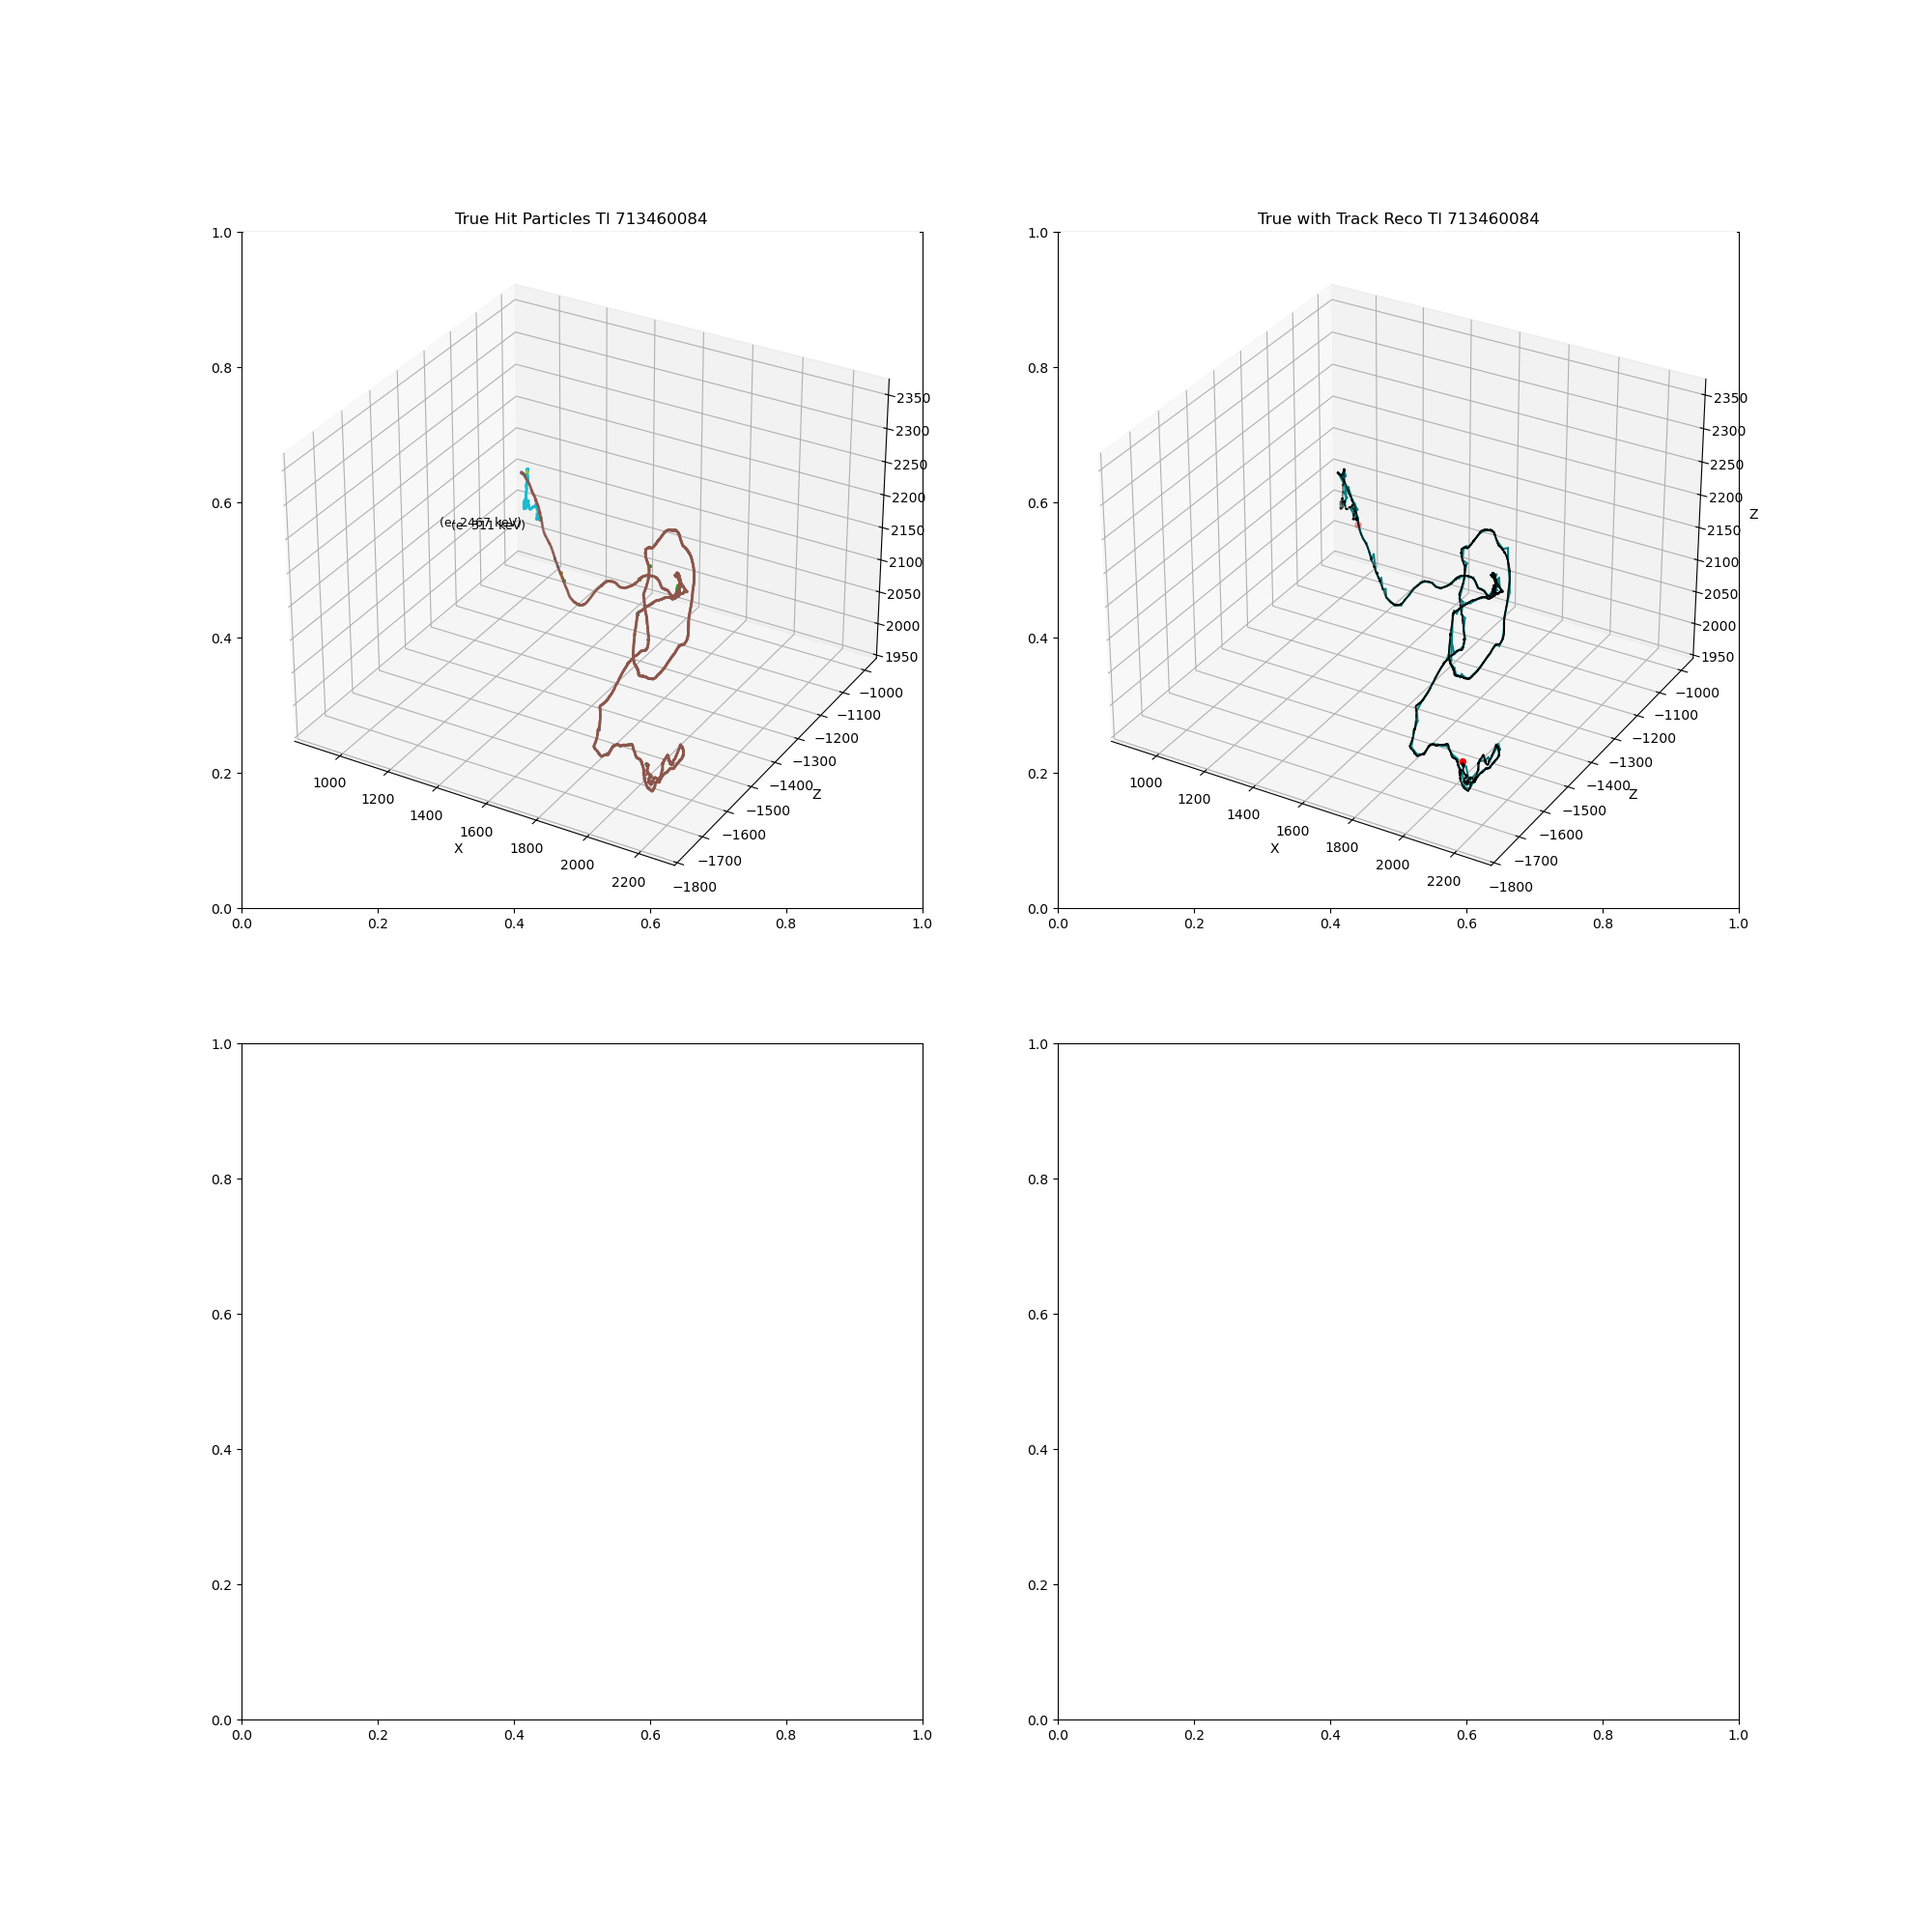

In [ ]:
# 3D Projection
# plt.figure()
# Create two side-by-side subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# --- First plot: 3D Projection ---
ax_3D = fig.add_subplot(221, projection='3d')
for p in event_hits_true.particle_id.unique():

    ax_3D.scatter(event_hits_true[event_hits_true.particle_id == p]['x'], 
                  event_hits_true[event_hits_true.particle_id == p]['y'], 
                  event_hits_true[event_hits_true.particle_id == p]['z'], 
                  marker='o', s=1)

for index, row in event_parts_true[event_parts_true.kin_energy > 0.1].iterrows():
    Energy = round(row["kin_energy"] * 1000)
    particle_name = row["particle_name"]

    if particle_name == "gamma":
        continue

    ax_3D.text(row["initial_x"], row["initial_y"], row["initial_z"] + 3000, 
               f"({particle_name} {Energy} keV)", fontsize=9, ha='right', va='bottom', color='black')


ax_3D.set_title(f"True Hit Particles {event.Type.iloc[0]} {evid}")
ax_3D.set_xlabel("X")
ax_3D.set_ylabel("Y")
ax_3D.set_ylabel("Z")

# --- Second plot: Example scatter plot ---
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(event_hits_true['x'], event_hits_true['y'], event_hits_true['z'],c="k", s=0.1)
plot_tracks_3D(ax2, event['x'], event['y'], event['z'], connection_count, Track)
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_ylabel("Z")
ax2.set_title(f"True with Track Reco {event.Type.iloc[0]} {evid}")


event_diffused_hits = CutandRedistibuteEnergy(event_diffused_hits, 0.0004)
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(event_diffused_hits['x'], event_diffused_hits['y'], event_diffused_hits['z'],c=event_diffused_hits['energy'], s=0.5)
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_ylabel("Z")
ax3.set_title(f"True with Diffusion {event.Type.iloc[0]} {evid}")


plt.tight_layout()
plt.show()


In [ ]:
display(event_parts_true[event_parts_true.kin_energy>0.1])
display(event_parts_true)

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
8354,126300013,1,gamma,1,0,2213.107422,-508.710327,-1122.521729,0.000000,1679.144165,...,-1.807621,1.007665,-1.573887,-0.0,0.0,-0.0,2.600000,768.028625,none,phot
8392,126300013,2,e-,0,1,1679.144165,-211.050568,-1587.441040,2.561868,1044.450439,...,-2.494369,0.768608,-1.546186,-0.0,-0.0,-0.0,2.565435,3139.085205,phot,eIoni
8572,126300013,105,e-,0,2,1109.193481,-209.963257,-2194.352295,9.544023,1113.668823,...,0.120728,0.329507,-0.068514,0.0,-0.0,-0.0,0.112671,66.822060,eIoni,eIoni
8830,126300013,47,e-,0,2,1510.761841,-172.725082,-1705.270752,3.286844,1587.459961,...,0.118575,0.322151,-0.786943,0.0,-0.0,0.0,0.488121,626.734253,eIoni,eIoni


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
8354,126300013,1,gamma,1,0,2213.107422,-508.710327,-1122.521729,0.000000,1679.144165,...,-1.807621,1.007665,-1.573887,-0.0,0.0,-0.0,2.600000,768.028625,none,phot
8355,126300013,19,e-,0,1,1679.144165,-211.050568,-1587.441040,2.561868,1679.145020,...,0.003610,-0.001733,0.002231,-0.0,0.0,-0.0,0.000021,0.001804,phot,msc
8356,126300013,18,e-,0,1,1679.144165,-211.050568,-1587.441040,2.561868,1679.143921,...,-0.003986,0.002013,0.001783,0.0,-0.0,-0.0,0.000023,0.000281,phot,msc
8357,126300013,17,e-,0,1,1679.144165,-211.050568,-1587.441040,2.561868,1679.144653,...,0.002786,-0.002826,-0.002295,-0.0,-0.0,-0.0,0.000021,0.000906,phot,msc
8358,126300013,16,e-,0,1,1679.144165,-211.050568,-1587.441040,2.561868,1679.143921,...,-0.000775,0.002792,0.003552,-0.0,0.0,0.0,0.000021,0.001905,phot,eIoni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8981,126300013,43,e-,0,2,1549.228149,-180.395309,-1660.310181,3.084151,1549.225586,...,-0.025301,-0.027364,0.013934,0.0,0.0,0.0,0.001547,0.043934,eIoni,eIoni
8982,126300013,42,e-,0,2,1667.558716,-207.542068,-1594.589722,2.609437,1667.540894,...,-0.029985,0.005312,0.047278,-0.0,-0.0,0.0,0.003085,0.155787,eIoni,eIoni
8983,126300013,41,e-,0,2,1670.530151,-208.346222,-1592.865845,2.597500,1670.777344,...,0.045836,0.062841,-0.064305,-0.0,0.0,0.0,0.009871,1.093965,eIoni,eIoni
8984,126300013,632,e-,0,41,1670.767090,-208.432632,-1592.910400,2.605728,1670.748291,...,-0.035554,-0.026539,-0.008354,-0.0,-0.0,0.0,0.001990,0.091613,eIoni,eIoni


In [ ]:
# Save all the background events




# for i, evid in enumerate(Tl_topology_evts):
#     event = Tl[Tl.event_id == evid]
#     event.index = event.id
#     Track = Tracks_Tl[evid]
#     connection = connections_Tl[evid]
#     connection_count = connection_counts_Tl[evid]

#     # Tortuosity plot
#     plt.figure()
#     plt.plot(event[event.primary == 1].cumulative_distance, event[event.primary == 1].Tortuosity, color="k")
#     plt.xlabel("Cumulative Length [mm]")
#     plt.ylabel("Tortuosity")
#     plt.title(f"Event {evid}")
#     plt.savefig(f"plots/Dave/SelectedBkg/Background_Evt{evid}_Tortuosity.pdf")

#     if i == 0:
#         plt.show()  # Show only the first figure
#     else:
#         plt.close()  # Close the figure to avoid displaying

#     # Create subplots for 3D projections
#     fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#     # Plot projections
#     plot_tracks(axs[0], event['x'], event['y'], connection_count, 'X', 'Y', Track)
#     plot_tracks(axs[1], event['x'], event['z'], connection_count, 'X', 'Z', Track)
#     plot_tracks(axs[2], event['y'], event['z'], connection_count, 'Y', 'Z', Track)

#     fig.suptitle(f"Event {evid}")

#     plt.tight_layout()
#     plt.savefig(f"plots/Dave/SelectedBkg/Background_Evt{evid}.pdf")
    
#     plt.close(fig)  # Close the figure after saving to prevent display


# def SaveInteractive3D(event_hits, filename):
#     fig = px.scatter_3d(event_hits, x='x', y='y', z='z', color='energy',
#                          title="3D Event Display", color_continuous_scale="Spectral")
    
#     fig.update_layout(scene=dict(
#         xaxis_title="X [mm]",
#         yaxis_title="Y [mm]",
#         zaxis_title="Z [mm]",
#         bgcolor='black',
#         xaxis=dict(
#             showbackground=False,  # Remove X plane
#             showgrid=False,
#             zeroline=False
#         ),
#         yaxis=dict(
#             showbackground=False,  # Remove Y plane
#             showgrid=False,
#             zeroline=False
#         ),
#         zaxis=dict(
#             showbackground=False,  # Remove Z plane
#             showgrid=False,
#             zeroline=False
#         ),
#     ))

#     pio.write_html(fig, filename)  # Save as interactive HTML file

# for i, evid in enumerate(Tl_topology_evts):
#     event = Tl[Tl.event_id == evid]

#     SaveInteractive3D(event, f"plots/Dave/SelectedBkg/Background_Evt{evid}_3D.html")

